In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Logit - L')

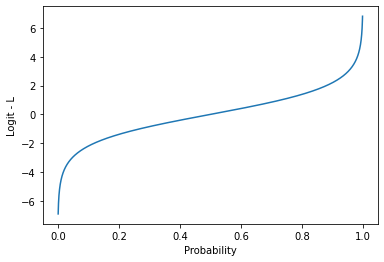

In [2]:
def logit(x):
  return np.log( x / (1 - x) )
  
x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")

Text(0, 0.5, 'Probability')

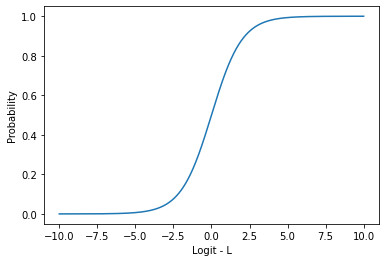

In [3]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))
x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

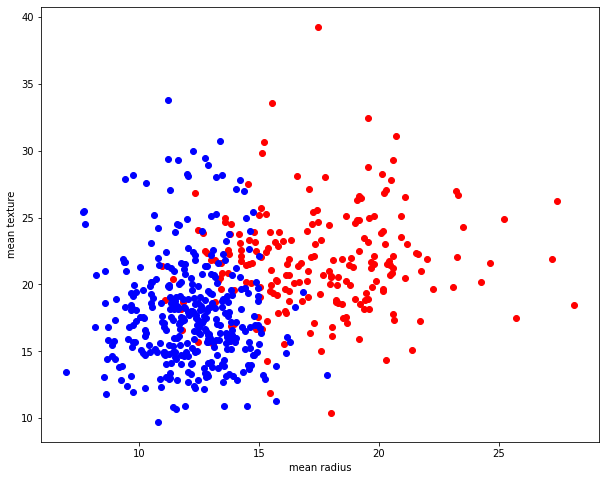

In [5]:
#---copy from dataset into a 2-d list---
X = []
for target in range(2):
  X.append([[], []])
  for i in range(len(cancer.data)): # target is 0 or 1
    if cancer.target[i] == target:
      X[target][0].append(cancer.data[i][0]) 
      X[target][1].append(cancer.data[i][1]) 

colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
  ax.scatter(X[target][0],
            X[target][1],
            c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

In [6]:
from mpl_toolkits.mplot3d import Axes3D

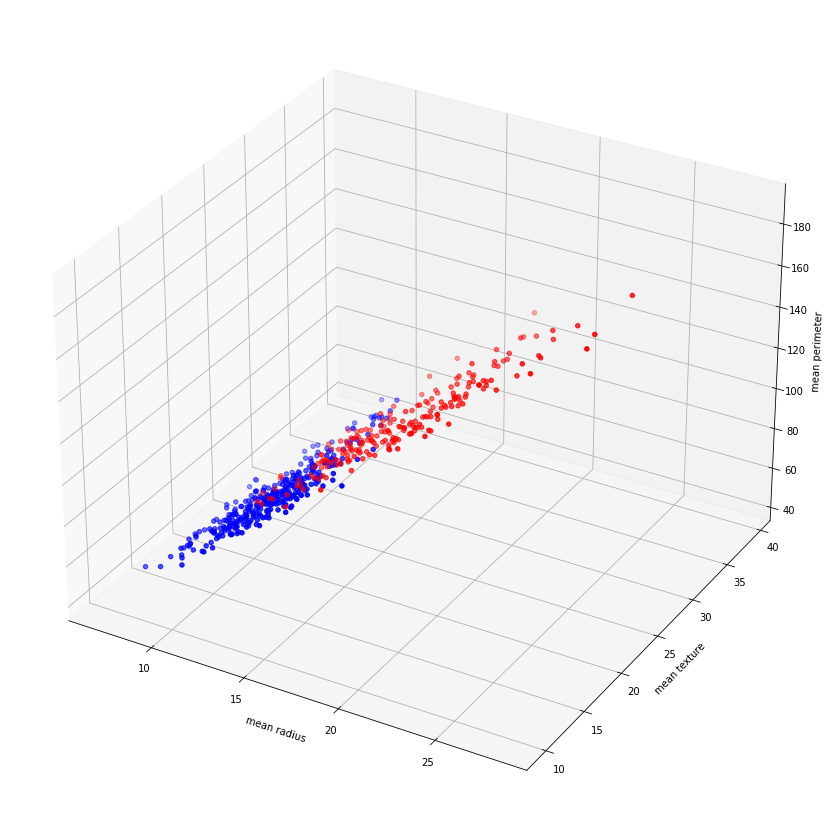

In [7]:
X = []
for target in range(2):
  X.append([[], [], []])
  for i in range(len(cancer.data)): # target is 0,1
    if cancer.target[i] == target:
      X[target][0].append(cancer.data[i][0])
      X[target][1].append(cancer.data[i][1])
      X[target][2].append(cancer.data[i][2])

colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
  ax.scatter(X[target][0],
            X[target][1],
            X[target][2],
            c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

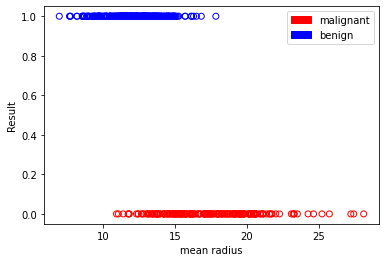

In [8]:
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset
x = cancer.data[:,0] # mean radius
y = cancer.target # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'} # 0: malignant, 1: benign
plt.scatter(x,y,
facecolors='none',
edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
colors[x]),
cmap=colors)
plt.xlabel("mean radius")
plt.ylabel("Result")
red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')
plt.legend(handles=[red, blue], loc=1)

In [9]:
from sklearn import linear_model
import numpy as np
log_regress = linear_model.LogisticRegression()
#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),
y = y)
#---print trained model intercept---
print(log_regress.intercept_) # [ 8.19393897]
#---print trained model coefficients---
print(log_regress.coef_) # [[-0.54291739]]

[15.120902]
[[-1.02475609]]


Text(0, 0.5, 'Probability')

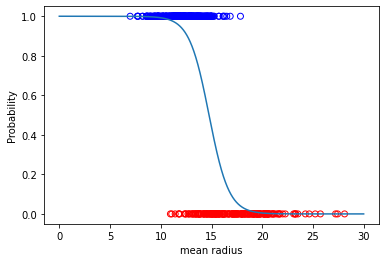

In [10]:
def sigmoid(x):
  return (1 / (1 + np.exp(-(log_regress.intercept_[0] +
(log_regress.coef_[0][0] * x)))))
x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(x,y,
facecolors='none',
edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
colors[x]),
cmap=colors)
plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [11]:
print(log_regress.predict_proba([[20]])) # [[0.93489354 0.06510646]]

[[0.99538685 0.00461315]]
